In [1]:
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.gridspec import GridSpec
from IPython.display import HTML

In [2]:
def joint_period(omega_x, omega_y):

    if omega_x == 0 or omega_y == 0:
        return 2 * np.pi

    ratio = Fraction(omega_x / omega_y).limit_denominator(1000)
    joint_period = 2 * np.pi * ratio.numerator / omega_x

    return joint_period

In [3]:
def format_coeff(num):

    if num == 1:
        return ''
    if num == -1:
        return '-'

    return f'{round(num, 3)}'

In [4]:
def format_phase(phi):

    if phi == 'phi(t)':
        return ' + \phi(t)'
    
    if phi < 0:
        return f'{round(phi, 3)}'
    elif phi == 0:
        return ''
    elif phi > 0:
        return f' + {round(phi, 3)}'

In [5]:
def one_plot(A_x, omega_x, A_y, omega_y, phi):
    
    scale = 1.2 * max(A_x, A_y)
    
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(6,6))
    
    ax.set_xlim(-scale, scale)
    ax.set_ylim(-scale, scale)

    ax.set_xlabel(
        rf'$x = {format_coeff(A_x)}\sin({format_coeff(omega_x)}t)$',
        fontsize=12
    )
    ax.xaxis.set_label_position('top')
    
    ax.set_ylabel(
        rf'$y ={format_coeff(A_y)}\sin({format_coeff(omega_y)}t{format_phase(phi)})$',
        fontsize=12
    )
    ax.yaxis.set_label_position('right')

    ax.grid(True, color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.set_aspect('equal')

    return fig, ax

In [6]:
def still_liss(A_x=1, omega_x=1, A_y=1, omega_y=1, phi=0, save=False):

    interval = 2 * joint_period(omega_x, omega_y)
    t = np.linspace(0, interval, 1000)

    x = A_x * np.sin(omega_x * t)
    y = A_y * np.sin(omega_y * t + phi)

    fig, ax = one_plot(A_x, omega_x, A_y, omega_y, phi)
    plt.plot(x, y, color='orange', linewidth=2)
    
    if save:
        values = [A_x, omega_x, A_y, omega_y, phi]
        filename = 'SL_' + '_'.join(f'{round(val, 3):g}' for val in values) + '.png'
        plt.savefig(filename)

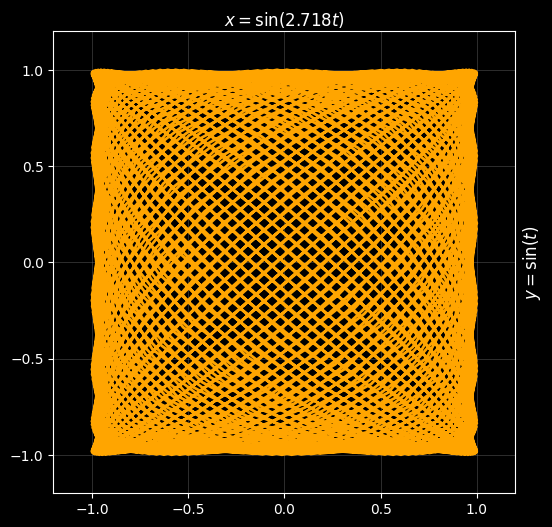

In [7]:
still_liss(omega_x=np.e)

In [7]:
def anim_liss(
    A_x=1, omega_x=1, A_y=1, omega_y=1, phi=0, draw=False, vary_phase=True, 
    show_dot=False, frames=200, fps=20, save=False, display=False
):

    interval = 2 * joint_period(omega_x, omega_y)
    t = np.linspace(0, interval, 1000)
    t_norm = t / t[-1] * (frames / fps)
    
    if vary_phase:
        phases = np.linspace(0, 2*np.pi, frames, endpoint=False)
        fig, ax = one_plot(A_x, omega_x, A_y, omega_y, 'phi(t)')
    else:
        fig, ax = one_plot(A_x, omega_x, A_y, omega_y, phi)
    
    liss_wave, = ax.plot([], [], color='orange', linewidth=2)
    liss_dot, = ax.plot([], [], color='white', marker='o')

    artists = [liss_wave, liss_dot]

    if draw:
        half_frames = frames // 2
    
    phase = phi
    
    def update(frame):

        if vary_phase:
            phase = phases[frame]
        
        x = A_x * np.sin(omega_x * t)
        y = A_y * np.sin(omega_y * t + phase)

        index = int(frame / frames * (len(t)))
        x_point = x[index]
        y_point = y[index]

        if draw:
            if frame < half_frames:
                liss_wave.set_data(x[:index+1], y[:index+1])
            else:
                liss_wave.set_data(x[index:], y[index:])
        else:
            liss_wave.set_data(x, y)
            
        if show_dot:
            liss_dot.set_data([x_point], [y_point])
        
        return artists
    
    anim = FuncAnimation(
        fig, update, frames=frames, interval=1000/fps, blit=True, repeat=True
    )
    
    if save:
        values = [A_x, omega_x, A_y, omega_y, phi]
        parameters = [draw, vary_phase, show_dot, frames, fps]
        filename = (
            'AL_' + 
            '_'.join(f'{round(val, 3):g}' for val in values) +
            '_' + 
            '_'.join(f'{par}' for par in parameters) + 
            '.gif'
        )
        anim.save(filename, writer=PillowWriter(fps=fps))

    plt.close(fig)

    if display:
        return HTML(anim.to_jshtml())

In [11]:
def liss_and_waves(
    A_x=1, omega_x=1, A_y=1, omega_y=1, phi=0, draw=False, vary_phase=True, 
    show_dot=False, frames=200, fps=20, save=False, display=False
):

    interval = 2 * joint_period(omega_x, omega_y)
    t = np.linspace(0, interval, 1000)
    t_norm = t / t[-1] * (frames / fps)
    half_t = frames/fps/2

    title_phi = phi
    if vary_phase:
        title_phi = 'phi(t)'
        phases = np.linspace(0, 2*np.pi, frames, endpoint=False)
    
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(10,10))
    gs = GridSpec(
        3, 3, width_ratios=[1,1,1], height_ratios=[1,1,1], hspace=0.25, wspace=0.25
    )

    ax_liss = fig.add_subplot(gs[1,1])
    ax_top = fig.add_subplot(gs[0,1])
    ax_bottom = fig.add_subplot(gs[2,1])
    ax_left = fig.add_subplot(gs[1,0])
    ax_right = fig.add_subplot(gs[1,2])

    scale = 1.2 * max(A_x, A_y)
    
    ax_liss.set_xlim(-scale, scale)
    ax_liss.set_ylim(-scale, scale)
    ax_liss.set_aspect('equal')
    ax_liss.set_title('Lissajous Figure', fontsize=14)
    
    for ax in (ax_top, ax_bottom):
        ax.set_xlim(-scale, scale)
        ax.set_ylim(0, half_t)
        ax.set_title(
            rf'$x = {format_coeff(A_x)}\sin({format_coeff(omega_x)}t)$',
            fontsize=12
        )
        
    for ax in (ax_left, ax_right):
        ax.set_xlim(0, half_t)
        ax.set_ylim(-scale, scale)
        ax.set_title(
            rf'$y = {format_coeff(A_y)}\sin({format_coeff(omega_y)}t{format_phase(title_phi)})$',
            fontsize=12
        )

    for ax in [ax_liss, ax_top, ax_bottom, ax_left, ax_right]:
        ax.grid(True, color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    liss_wave, = ax_liss.plot([], [], color='orange', linewidth=2)
    liss_dot, = ax_liss.plot([], [], color='white', marker='o')

    top_wave, = ax_top.plot([], [], color='blue', linewidth=2)
    top_dot, = ax_top.plot([], [], color='white', marker='o')
    bottom_wave, = ax_bottom.plot([], [], color='blue', linewidth=2)
    bottom_dot, = ax_bottom.plot([], [], color='white', marker='o')

    left_wave, = ax_left.plot([], [], color='red', linewidth=2)
    left_dot, = ax_left.plot([], [], color='white', marker='o')
    right_wave, = ax_right.plot([], [], color='red', linewidth=2)
    right_dot, = ax_right.plot([], [], color='white', marker='o')
    
    artists = [liss_wave, liss_dot, 
               top_wave, top_dot, 
               bottom_wave, bottom_dot, 
               left_wave, left_dot, 
               right_wave, right_dot]
    
    if draw:
        half_frames = frames // 2
        
    phase = phi

    def update(frame):
        
        if vary_phase:
            phase = phases[frame]

        x = A_x * np.sin(omega_x * t)
        y = A_y * np.sin(omega_y * t + phase)

        index = int(frame / frames * len(t))
        x_point = x[index]
        y_point = y[index]
        t_point = t_norm[index]

        if draw:
            
            x_draw = x[:index+1]
            y_draw = y[:index+1]
            t_draw = t_norm[:index+1]
            
            x_erase = x[index:]
            y_erase = y[index:]
            t_erase = t_norm[index:]
            
            if frame < half_frames:
                liss_wave.set_data(x_draw, y_draw)
                t_draw_wrap = t_draw % half_t
                top_wave.set_data(x_draw, t_draw_wrap)
                bottom_wave.set_data(x_draw, t_draw_wrap)
                left_wave.set_data(t_draw_wrap, y_draw)
                right_wave.set_data(t_draw_wrap, y_draw)
                
            else:
                liss_wave.set_data(x_erase, y_erase)
                t_erase_wrap = t_erase % half_t
                t_erase_wrap[np.diff(np.r_[t_erase_wrap[0], t_erase_wrap]) < 0] = np.nan          
                top_wave.set_data(x_erase, t_erase_wrap)
                bottom_wave.set_data(x_erase, t_erase_wrap)
                left_wave.set_data(t_erase_wrap, y_erase)
                right_wave.set_data(t_erase_wrap, y_erase)
                
        else:
            liss_wave.set_data(x, y)
            top_wave.set_data(x, t_norm)
            bottom_wave.set_data(x, t_norm)
            left_wave.set_data(t_norm, y)
            right_wave.set_data(t_norm, y)
        
        if show_dot:
            liss_dot.set_data([x_point], [y_point])
            t_wrap = t_point % half_t
            top_dot.set_data([x_point], [t_wrap])
            bottom_dot.set_data([x_point], [t_wrap])
            left_dot.set_data([t_wrap], [y_point])
            right_dot.set_data([t_wrap], [y_point])

        return artists

    anim = FuncAnimation(
        fig, update, frames=frames, interval=1000/fps, blit=True, repeat=True
    )
    
    if save:
        values = [A_x, omega_x, A_y, omega_y, phi]
        parameters = [draw, vary_phase, show_dot, frames, fps]
        filename = (
            'LW_' + 
            '_'.join(f'{round(val, 3):g}' for val in values) +
            '_' + 
            '_'.join(f'{par}' for par in parameters) + 
            '.gif'
        )
        anim.save(filename, writer=PillowWriter(fps=fps))

    plt.close(fig)

    if display:
        return HTML(anim.to_jshtml())